*Importing Modules*

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

*Importing & Exploring Dataset*

In [56]:
data = pd.read_csv("survey lung cancer.csv")
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [58]:
data.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [59]:
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


*Copy of Dataset for Visualization*

In [60]:
data_temp = data.copy()
data_temp["GENDER"] = data_temp["GENDER"].replace({"M" : "Male" , "F" : "Female"})

for column in data_temp.columns:
    data_temp[column] = data_temp[column].replace({2: "Yes" , 1 : "No"})

data_temp.head()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Male,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,YES
1,Male,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,YES
2,Female,59,No,No,No,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Yes,NO
3,Male,63,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,Yes,Yes,NO
4,Female,63,No,Yes,No,No,No,No,No,Yes,No,Yes,Yes,No,No,NO


*Positive Lung Cancer Cases*

In [61]:
data_temp_pos = data_temp[data_temp["LUNG_CANCER"] == "YES"]
data_temp_pos.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Male,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,YES
1,Male,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,YES
5,Female,75,No,Yes,No,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,YES
6,Male,52,Yes,No,No,No,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes,YES
7,Female,51,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,No,Yes,Yes,No,YES


*Positive Cases Age Distribution*

In [62]:
sns.set_style("whitegrid")
sns.set_context("poster",font_scale = .7)

palette = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020", "#89CFF0",  "#FFB6C1"]

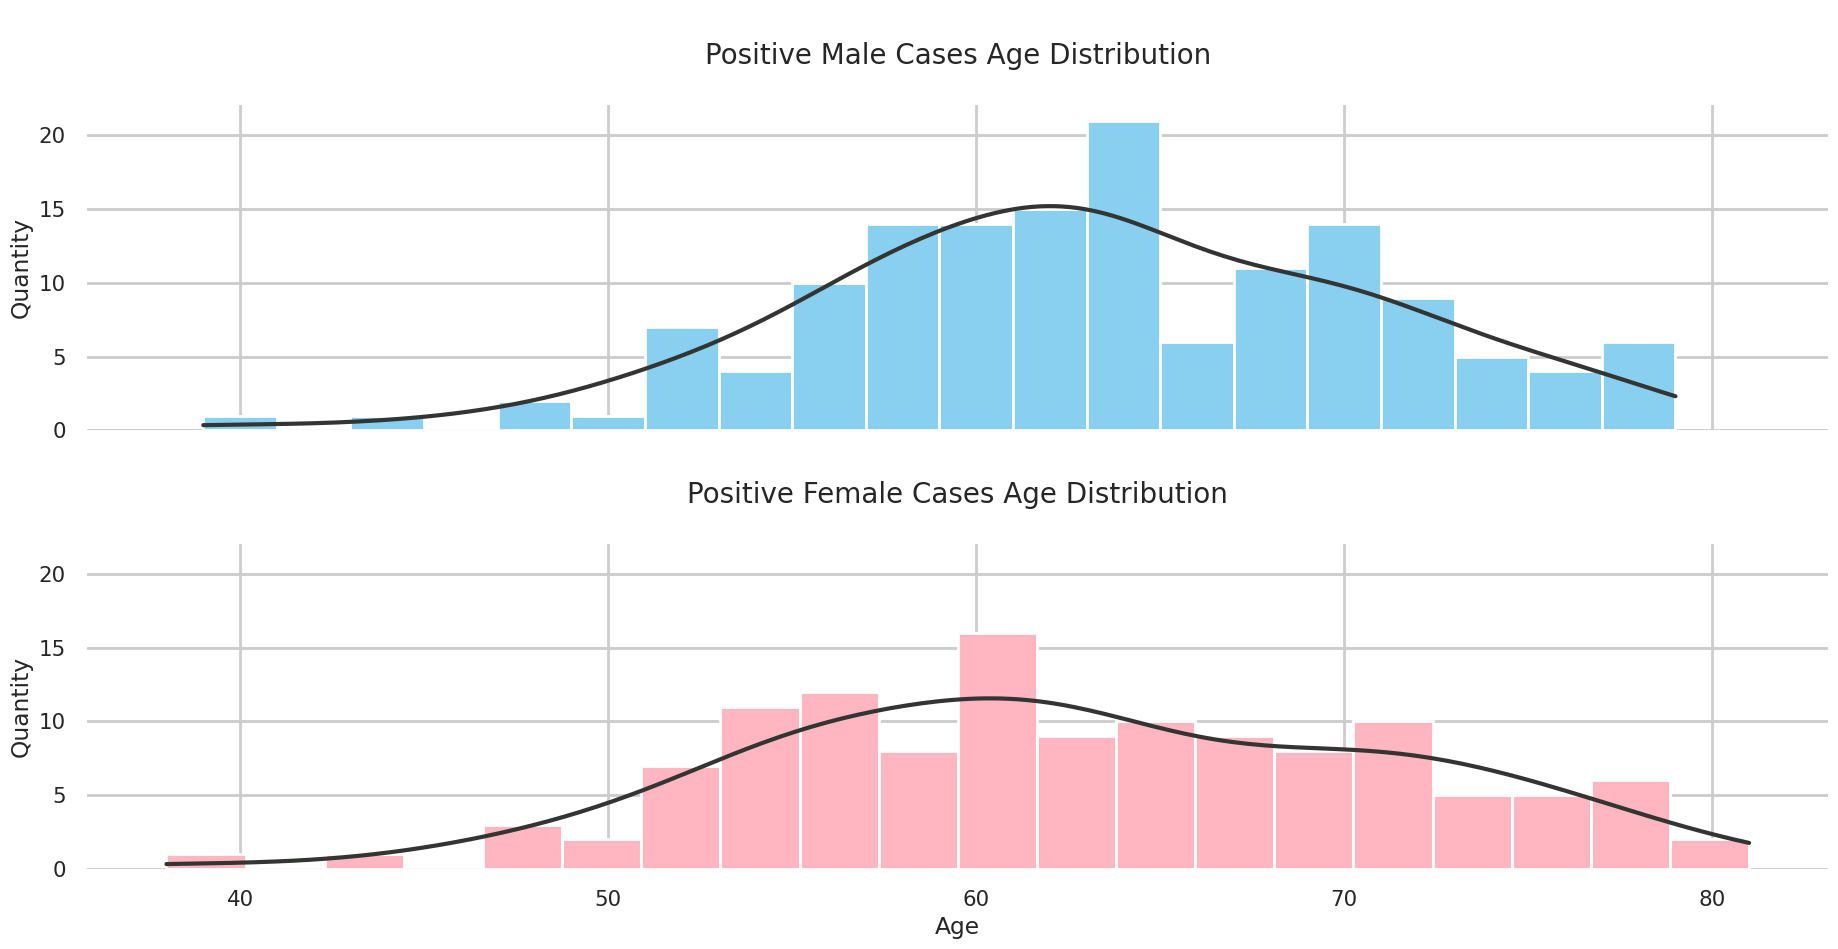

In [63]:
_, axs = plt.subplots(2,1,figsize=(20,10),sharex=True,sharey=True)
plt.tight_layout(pad=4.0)

sns.histplot(data_temp_pos[data_temp_pos["GENDER"]=="Male"]["AGE"],color=palette[14],kde=True,ax=axs[0],bins=20,alpha=1,fill=True)
axs[0].lines[0].set_color(palette[12])
axs[0].set_title("\nPositive Male Cases Age Distribution\n",fontsize=20)
axs[0].set_xlabel("Age")
axs[0].set_ylabel("Quantity")

sns.histplot(data_temp_pos[data_temp_pos["GENDER"]=="Female"]["AGE"],color=palette[15],kde=True,ax=axs[1],bins=20,alpha=1,fill=True)
axs[1].lines[0].set_color(palette[12])
axs[1].set_title("\nPositive Female Cases Age Distribution\n",fontsize=20)
axs[1].set_xlabel("Age")
axs[1].set_ylabel("Quantity")

sns.despine(left=True, bottom=True)
plt.show()


*Stacking them together*

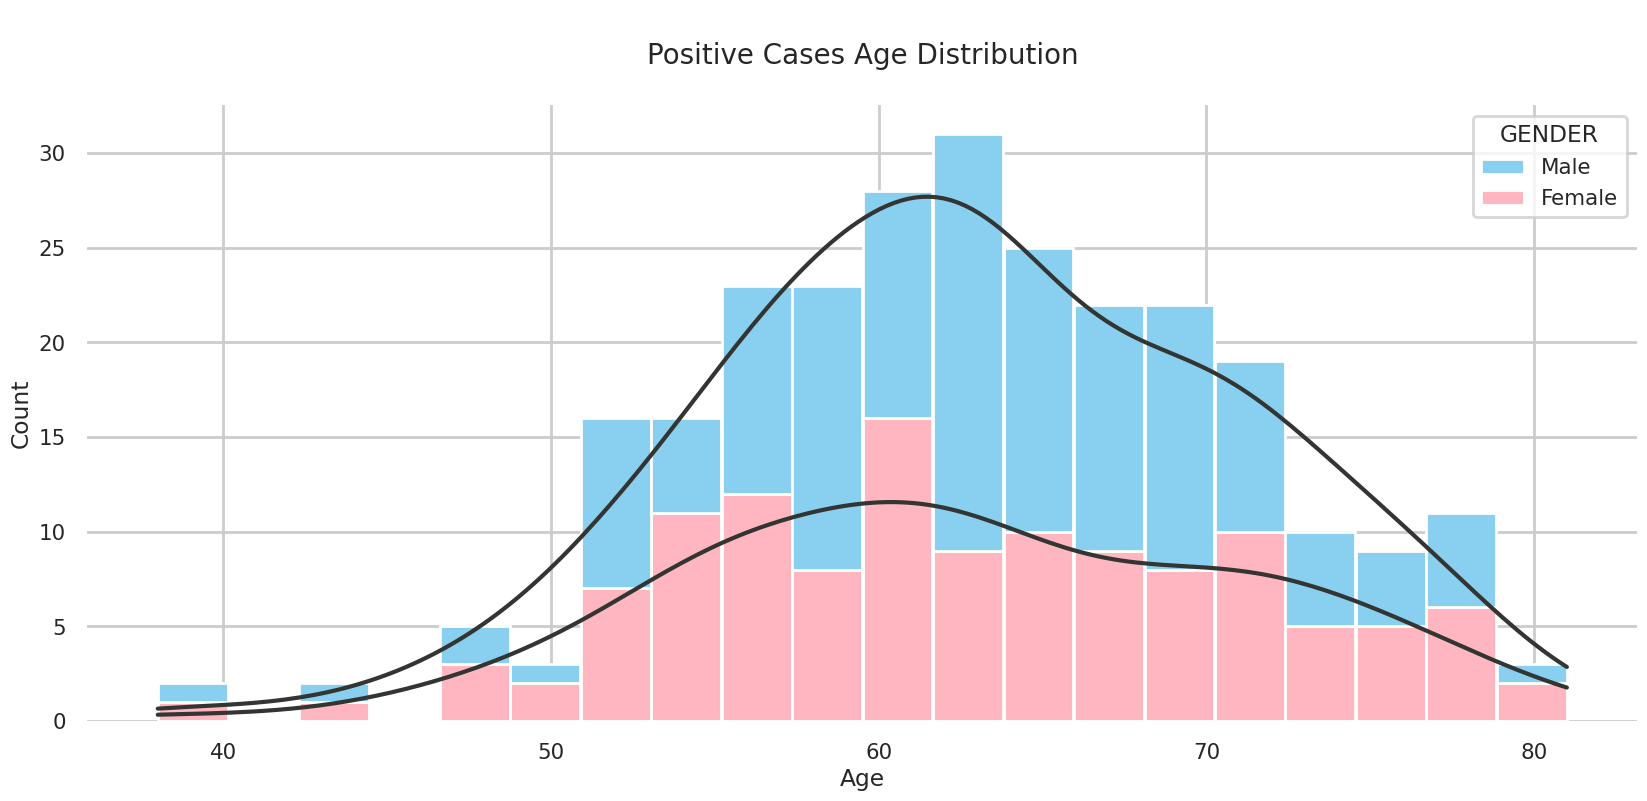

In [64]:
plt.subplots(figsize=(20, 8))
p = sns.histplot(data=data_temp_pos,x="AGE",hue="GENDER",multiple="stack",palette=palette[14:16],kde=True,shrink=.99,bins=20,alpha=1,fill=True)
p.axes.lines[0].set_color(palette[12])
p.axes.lines[1].set_color(palette[12])
p.axes.set_title("\nPositive Cases Age Distribution\n",fontsize=20)
plt.ylabel("Count")
plt.xlabel("Age")

sns.despine(left=True, bottom=True)
plt.show()

*Positive Cases Gender Distribution*

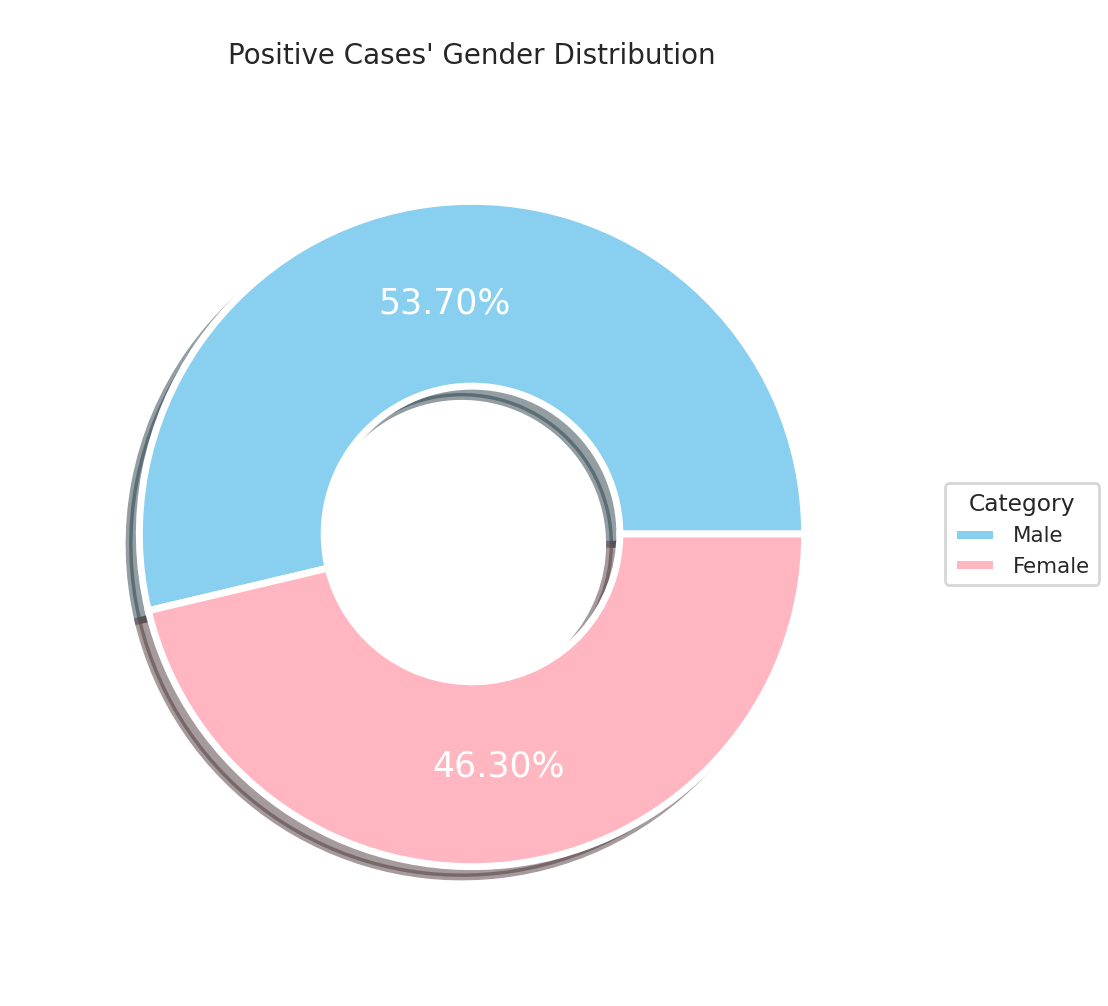

In [65]:
plt.subplots(figsize=(12, 12))

labels = "Male","Female"
size = 0.5

wedges, texts, autotexts = plt.pie([len(data_temp_pos[data_temp_pos["GENDER"]=="Male"]["GENDER"]),
                                    len(data_temp_pos[data_temp_pos["GENDER"]=="Female"]["GENDER"])],
                                    explode = (0,0),
                                    textprops=dict(size= 25, color= "white"),
                                    autopct="%.2f%%",
                                    pctdistance = 0.7,
                                    radius=.9,
                                    colors = [ "#89CFF0", "#FFB6C1"],
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "white",
                                    linewidth = 5),
                                    startangle = 0)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nPositive Cases' Gender Distribution",fontsize=20)
plt.show()


Lung Cancer Distribution:
LUNG_CANCER
YES    270
NO      39
Name: count, dtype: int64


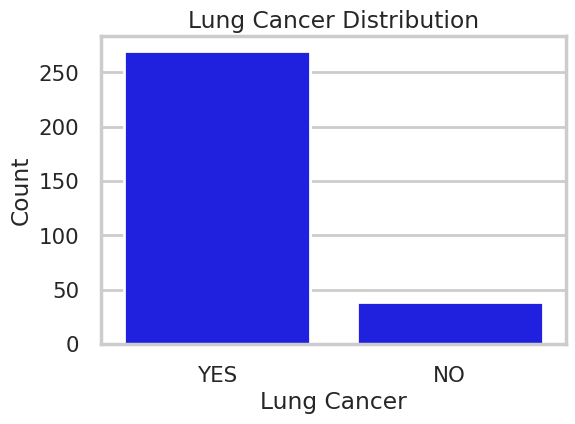

In [66]:
cancer_counts = data['LUNG_CANCER'].value_counts()
print("Lung Cancer Distribution:")
print(cancer_counts)

plt.figure(figsize=(6, 4))
sns.countplot(x='LUNG_CANCER', data=data, color="blue" )
plt.title("Lung Cancer Distribution")
plt.xlabel("Lung Cancer")
plt.ylabel("Count")
plt.show()


*Data-Encoding*

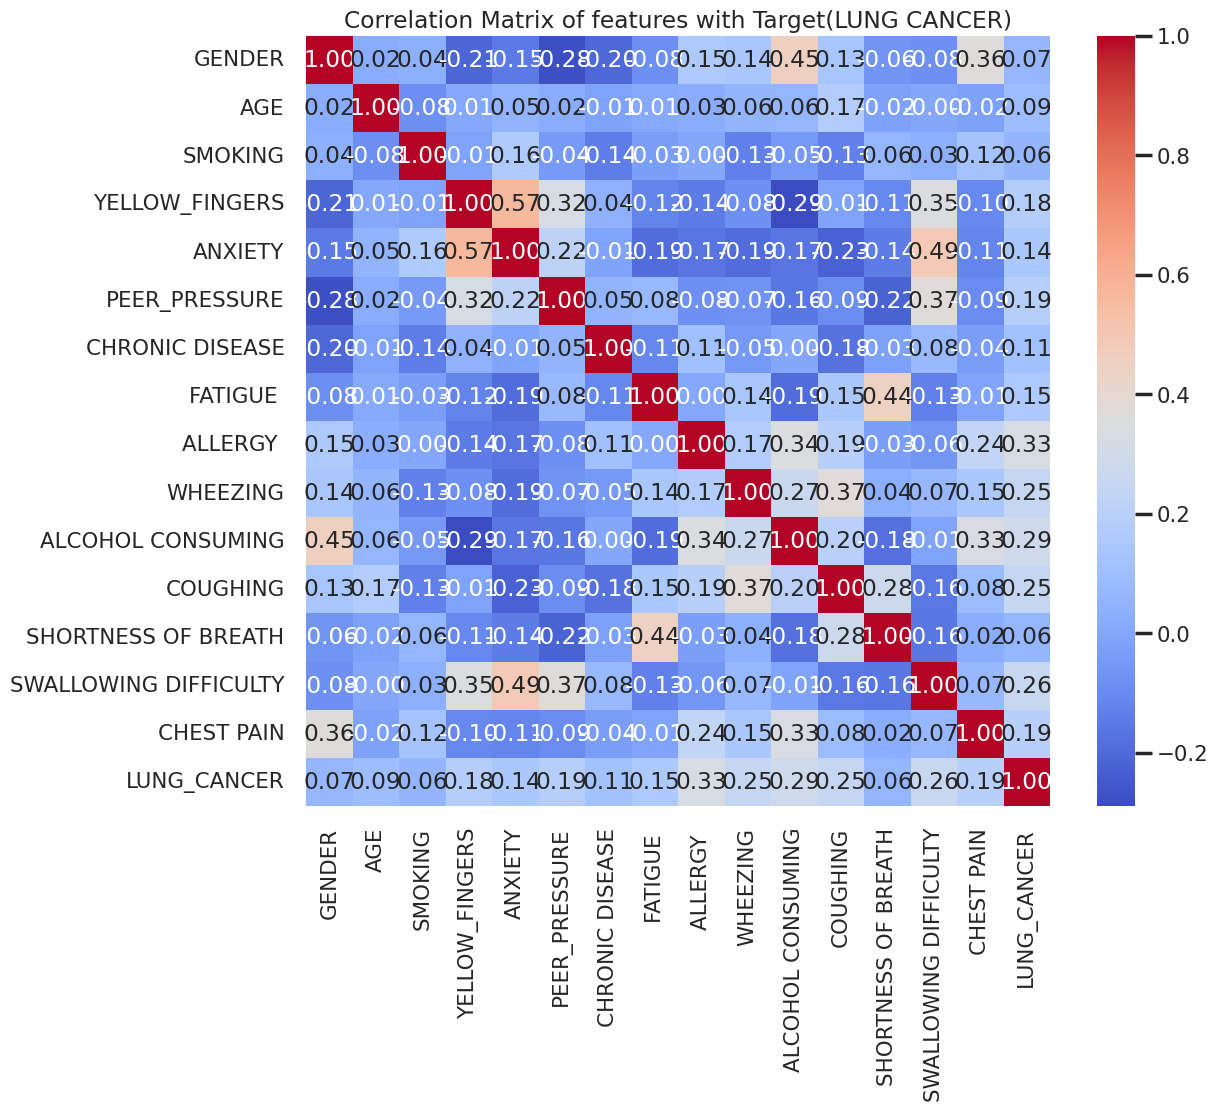

In [67]:
from sklearn.preprocessing import LabelEncoder

# Re-apply LabelEncoder to ensure GENDER and LUNG_CANCER are numeric
label_encoder_corr = LabelEncoder()
data['GENDER'] = label_encoder_corr.fit_transform(data['GENDER'])
data['LUNG_CANCER'] = label_encoder_corr.fit_transform(data['LUNG_CANCER'])

correlation_matrix = data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of features with Target(LUNG CANCER)")
plt.show()

In [68]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
binary_columns = ['GENDER','LUNG_CANCER']

for col in binary_columns:
  data[col]= label_encoder.fit_transform(data[col].astype(str))
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


*Visualisation*

In [69]:
import plotly.express as px
fig=px.pie(data,values='LUNG_CANCER',names='GENDER')
fig.show()

In [70]:
data.corr()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
GENDER,1.000000,0.021306,0.036277,-0.212959,-0.152127,-0.275564,-0.204606,-0.083560,0.154251,0.141207,0.454268,0.133303,-0.064911,-0.078161,0.362958,0.067254
AGE,0.021306,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104,0.089465
SMOKING,0.036277,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117,0.058179
YELLOW_FINGERS,-0.212959,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829,0.181339
ANXIETY,-0.152127,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634,0.144947
PEER_PRESSURE,-0.275564,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828,0.186388
CHRONIC DISEASE,-0.204606,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938,0.110891
FATIGUE,-0.083560,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832,0.150673
ALLERGY,0.154251,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433,0.327766
WHEEZING,0.141207,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640,0.249300


*Preprocessing*

In [71]:
x = data.drop("LUNG_CANCER", axis = 1)
y = data["LUNG_CANCER"]

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

print(f"Shape of training data : {x_train.shape}, {y_train.shape}")
print(f"Shape of testing data : {x_test.shape}, {y_test.shape}")

Shape of training data : (247, 15), (247,)
Shape of testing data : (62, 15), (62,)


*Logistic Regression*

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score,recall_score,f1_score


lr = LogisticRegression()

lr.fit(x_train, y_train)

lr_pred = lr.predict(x_test)

lr_conf = confusion_matrix(y_test, lr_pred)
lr_report = classification_report(y_test, lr_pred)
lr_acc = round(accuracy_score(y_test, lr_pred)*100, ndigits = 2)
lr_precision=precision_score(y_test, lr_pred)
lr_recall=recall_score(y_test, lr_pred)
lr_f1=f1_score(y_test, lr_pred)

print(f"Confusion Matrix : \n\n{lr_conf}")
print(f"\nClassification Report : \n\n{lr_report}")
print(f"\nThe Accuracy of Logistic Regression is {lr_acc} %")

Confusion Matrix : 

[[ 1  1]
 [ 1 59]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62


The Accuracy of Logistic Regression is 96.77 %


*Evaluation*

In [73]:
mselr = metrics.mean_squared_error(y_test, lr_pred)
print("Mean Squared Error:", mselr)

Mean Squared Error: 0.03225806451612903


In [74]:
rmselr = np.sqrt(mselr)
print("Root Mean Squared Error:", rmselr)

Root Mean Squared Error: 0.1796053020267749


*RIdge Regression*

In [75]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

ridge = RidgeClassifier()

ridge.fit(x_train, y_train)

ridge_pred = ridge.predict(x_test)

ridge_conf = confusion_matrix(y_test, ridge_pred)
ridge_report = classification_report(y_test, ridge_pred)
ridge_acc = round(accuracy_score(y_test, ridge_pred)*100, 2)
ridge_precision = precision_score(y_test, ridge_pred)
ridge_recall = recall_score(y_test, ridge_pred)
ridge_f1 = f1_score(y_test, ridge_pred)

print(f"Confusion Matrix : \n\n{ridge_conf}")
print(f"\nClassification Report : \n\n{ridge_report}")
print(f"\nThe Accuracy of Ridge Classifier is {ridge_acc} %")

Confusion Matrix : 

[[ 1  1]
 [ 1 59]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62


The Accuracy of Ridge Classifier is 96.77 %


*Evaluation*

In [76]:
mserr = metrics.mean_squared_error(y_test, ridge_pred)
print("Mean Squared Error:", mserr)

Mean Squared Error: 0.03225806451612903


In [77]:
rmserr = np.sqrt(mserr)
print("Root Mean Squared Error:", rmserr)

Root Mean Squared Error: 0.1796053020267749


*Random Forest*

In [78]:
from sklearn.ensemble import RandomForestClassifier

rfg = RandomForestClassifier(n_estimators = 100, random_state = 21)
rfg.fit(x_train, y_train)
rfg_pred = rfg.predict(x_test)
rfg_conf = confusion_matrix(y_test, rfg_pred)
rfg_report = classification_report(y_test, rfg_pred)
rfg_acc = round(accuracy_score(y_test, rfg_pred)*100, ndigits = 2)
rfg_precision=precision_score(y_test, rfg_pred)
rfg_recall=recall_score(y_test, rfg_pred)
rfg_f1=f1_score(y_test, rfg_pred)
print(f"Confusion Matrix : \n\n{rfg_conf}")
print(f"\nClassification Report : \n\n{rfg_report}")
print(f"\nThe Accuracy of Random Forest Classifier is {rfg_acc} %")

Confusion Matrix : 

[[ 1  1]
 [ 1 59]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62


The Accuracy of Random Forest Classifier is 96.77 %


*Naive-Bayes Model*

In [79]:
from sklearn.naive_bayes import GaussianNB # Changed from MultinomialNB

model = GaussianNB() # Changed from MultinomialNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
NB_conf = confusion_matrix(y_test, y_pred)
NB_report = classification_report(y_test, y_pred)
NB_acc = round(accuracy_score(y_test, y_pred)*100, ndigits = 2)
NB_precision=precision_score(y_test, y_pred)
NB_recall=recall_score(y_test, y_pred)
NB_f1=f1_score(y_test, y_pred)
print ("Accuracy", accuracy_score(y_test , y_pred))
print("Classification", classification_report(y_test , y_pred))
print("Confusion", confusion_matrix(y_test , y_pred))

Accuracy 0.9516129032258065
Classification               precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.98      0.97      0.97        60

    accuracy                           0.95        62
   macro avg       0.66      0.73      0.69        62
weighted avg       0.96      0.95      0.96        62

Confusion [[ 1  1]
 [ 2 58]]


*Comparing metrices*

                 Model  Accuracy  Precision     Recall   F1-Score
0  Logistic Regression    9677.0  98.333333  98.333333  98.333333
1        Random Forest    9677.0  98.333333  98.333333  98.333333
2          Naive Bayes    9516.0  98.305085  96.666667  97.478992


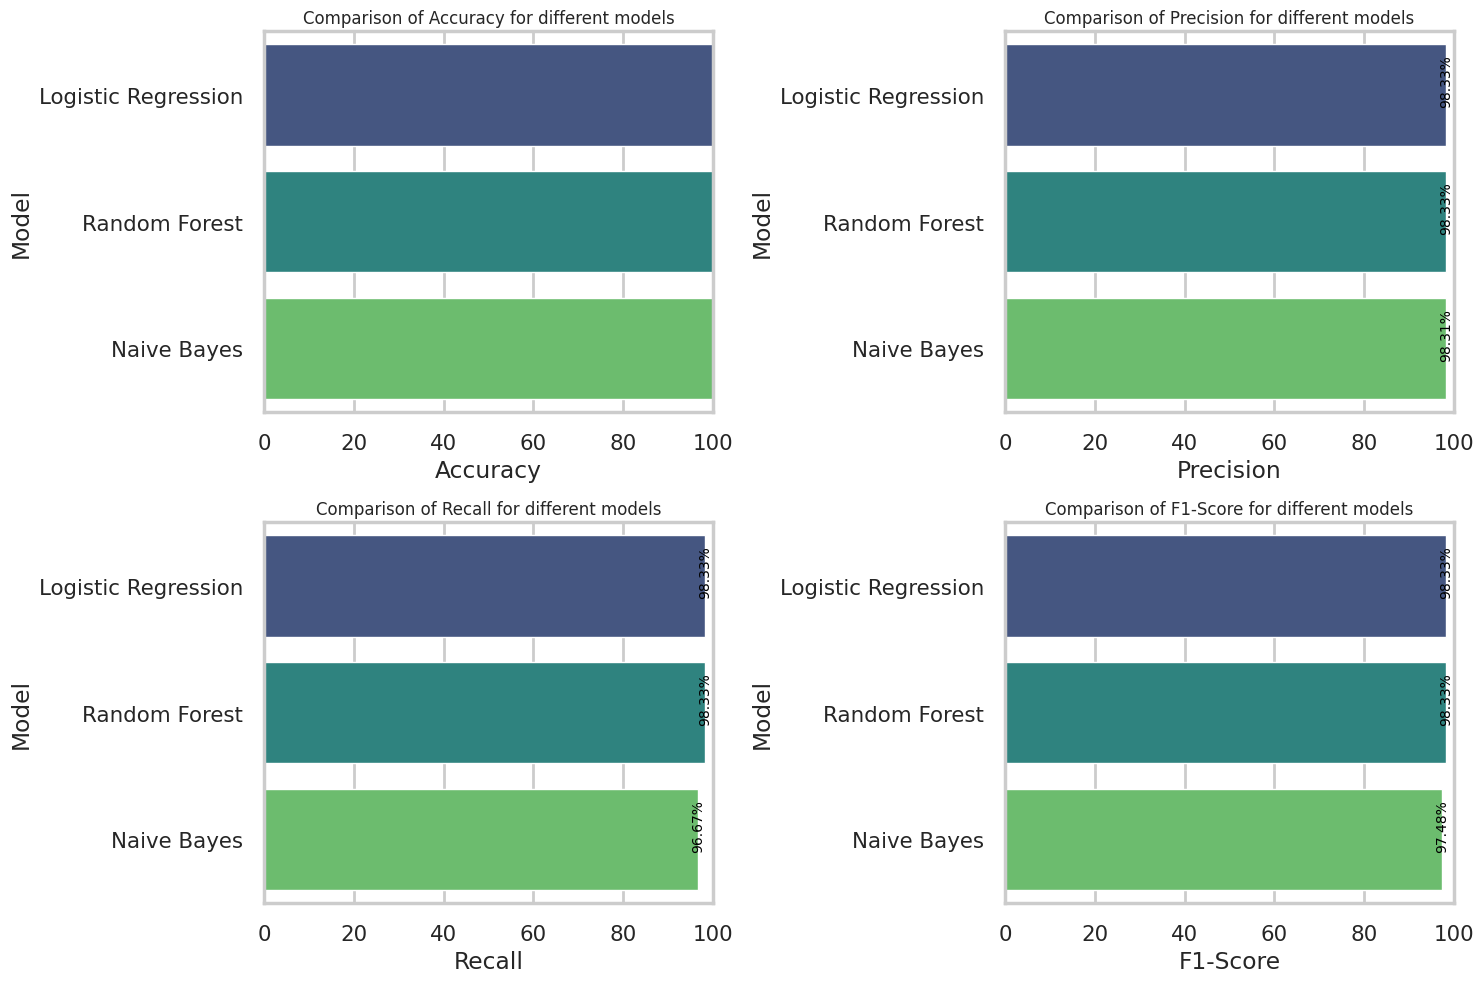

In [80]:
from matplotlib import axes
metrics_summary = {'Model': ['Logistic Regression','Random Forest','Naive Bayes'],
'Accuracy': [lr_acc*100,rfg_acc*100,NB_acc*100],
'Precision': [lr_precision*100,rfg_precision*100,NB_precision*100],
'Recall': [lr_recall*100,rfg_recall*100,NB_recall*100],
'F1-Score': [lr_f1*100,rfg_f1*100,NB_f1*100],
                   }
metrics_df = pd.DataFrame(metrics_summary)
print(metrics_df)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
fig,axes = plt.subplots(2,2,figsize=(15,10))
sns.set(style="whitegrid")
for i,metric in enumerate(metrics):
  sns.barplot(x=metric,y='Model',data=metrics_df,ax=axes[i//2,i%2],
              hue='Model',dodge=False,palette='viridis',legend=False)
  axes[i//2,i%2].set_title(f'Comparison of {metric} for different models')
  axes[i//2,i%2].set_xlim(0,100)
  for p in axes[i//2,i%2].patches:
    width=p.get_width()
    axes[i//2,i%2].annotate(f'{width:.2f}%',(width,p.get_y()+p.get_height()/2),
                            ha='center',va='center',fontsize=10,color='black',
                            textcoords='offset points',xytext=(0,10),
                            rotation=90
                          )
plt.tight_layout()
plt.show()



Clearly, Random Forest & Logistic Regression are performing well and are more suitable.

*LUNG CANCER PREDICTOR*

In [81]:
def predict_lung_cancer():

    print("LUNG CANCER PREDICTION SYSTEM")

    print("\nPlease enter the following information:")
    1

    try:
        gender = input("\nGender (M/F): ").strip().upper()
        while gender not in ['M', 'F']:
            print("Invalid input! Please enter M or F.")
            gender = input("Gender (M/F): ").strip().upper()

        age = int(input("Age: "))
        while age < 0 or age > 120:
            print("Invalid age! Please enter a valid age between 0-120.")
            age = int(input("Age: "))

        print("\nFor the following questions, enter 2 for YES or 1 for NO:")
        print("-"*60)

        smoking = int(input("Smoking (2=YES, 1=NO): "))
        while smoking not in [1, 2]:
            print("Invalid input! Enter 2 for YES or 1 for NO.")
            smoking = int(input("Smoking (2=YES, 1=NO): "))

        yellow_fingers = int(input("Yellow Fingers (2=YES, 1=NO): "))
        while yellow_fingers not in [1, 2]:
            print("Invalid input! Enter 2 for YES or 1 for NO.")
            yellow_fingers = int(input("Yellow Fingers (2=YES, 1=NO): "))

        anxiety = int(input("Anxiety (2=YES, 1=NO): "))
        while anxiety not in [1, 2]:
            print("Invalid input! Enter 2 for YES or 1 for NO.")
            anxiety = int(input("Anxiety (2=YES, 1=NO): "))

        peer_pressure = int(input("Peer Pressure (2=YES, 1=NO): "))
        while peer_pressure not in [1, 2]:
            print("Invalid input! Enter 2 for YES or 1 for NO.")
            peer_pressure = int(input("Peer Pressure (2=YES, 1=NO): "))

        chronic_disease = int(input("Chronic Disease (2=YES, 1=NO): "))
        while chronic_disease not in [1, 2]:
            print("Invalid input! Enter 2 for YES or 1 for NO.")
            chronic_disease = int(input("Chronic Disease (2=YES, 1=NO): "))

        fatigue = int(input("Fatigue (2=YES, 1=NO): "))
        while fatigue not in [1, 2]:
            print("Invalid input! Enter 2 for YES or 1 for NO.")
            fatigue = int(input("Fatigue (2=YES, 1=NO): "))

        allergy = int(input("Allergy (2=YES, 1=NO): "))
        while allergy not in [1, 2]:
            print("Invalid input! Enter 2 for YES or 1 for NO.")
            allergy = int(input("Allergy (2=YES, 1=NO): "))

        wheezing = int(input("Wheezing (2=YES, 1=NO): "))
        while wheezing not in [1, 2]:
            print("Invalid input! Enter 2 for YES or 1 for NO.")
            wheezing = int(input("Wheezing (2=YES, 1=NO): "))

        alcohol = int(input("Alcohol Consuming (2=YES, 1=NO): "))
        while alcohol not in [1, 2]:
            print("Invalid input! Enter 2 for YES or 1 for NO.")
            alcohol = int(input("Alcohol Consuming (2=YES, 1=NO): "))

        coughing = int(input("Coughing (2=YES, 1=NO): "))
        while coughing not in [1, 2]:
            print("Invalid input! Enter 2 for YES or 1 for NO.")
            coughing = int(input("Coughing (2=YES, 1=NO): "))

        shortness_breath = int(input("Shortness of Breath (2=YES, 1=NO): "))
        while shortness_breath not in [1, 2]:
            print("Invalid input! Enter 2 for YES or 1 for NO.")
            shortness_breath = int(input("Shortness of Breath (2=YES, 1=NO): "))

        swallowing_difficulty = int(input("Swallowing Difficulty (2=YES, 1=NO): "))
        while swallowing_difficulty not in [1, 2]:
            print("Invalid input! Enter 2 for YES or 1 for NO.")
            swallowing_difficulty = int(input("Swallowing Difficulty (2=YES, 1=NO): "))

        chest_pain = int(input("Chest Pain (2=YES, 1=NO): "))
        while chest_pain not in [1, 2]:
            print("Invalid input! Enter 2 for YES or 1 for NO.")
            chest_pain = int(input("Chest Pain (2=YES, 1=NO): "))

        gender_encoded = 1 if gender == 'M' else 0

        user_features = np.array([[gender_encoded, age, smoking, yellow_fingers, anxiety,
                                   peer_pressure, chronic_disease, fatigue, allergy, wheezing,
                                   alcohol, coughing, shortness_breath, swallowing_difficulty,
                                   chest_pain]])

        user_features_scaled = scaler.transform(user_features)

        prediction = rfg.predict(user_features_scaled)
        prediction_proba = rfg.predict_proba(user_features_scaled)



        print("\nPREDICTION RESULTS")
        print("-"*60)

        if prediction[0] == 1:
            print(f"\nPREDICTION: HIGH RISK OF LUNG CANCER")
            print(f"Confidence: {prediction_proba[0][1]*100:.2f}%")
            print("\n")
        else:
            print(f"\nPREDICTION: LOW RISK OF LUNG CANCER")
            print(f"Confidence: {prediction_proba[0][0]*100:.2f}%")
            print("\n")



        print("NOTE: This is a predictive model and should NOT replace")
        print("professional medical diagnosis. Please consult a healthcare")
        print("provider for accurate diagnosis and treatment.")


    except ValueError:
        print("\n❌ Error: Invalid input! Please enter numeric values where required.")
    except Exception as e:
        print(f"\n❌ An error occurred: {str(e)}")

predict_lung_cancer();

LUNG CANCER PREDICTION SYSTEM

Please enter the following information:

Gender (M/F): M
Age: 19

For the following questions, enter 2 for YES or 1 for NO:
------------------------------------------------------------
Smoking (2=YES, 1=NO): 2
Yellow Fingers (2=YES, 1=NO): 1
Anxiety (2=YES, 1=NO): 2
Peer Pressure (2=YES, 1=NO): 2
Chronic Disease (2=YES, 1=NO): 1
Fatigue (2=YES, 1=NO): 1
Allergy (2=YES, 1=NO): 1
Wheezing (2=YES, 1=NO): 2
Alcohol Consuming (2=YES, 1=NO): 2
Coughing (2=YES, 1=NO): 1
Shortness of Breath (2=YES, 1=NO): 2
Swallowing Difficulty (2=YES, 1=NO): 1
Chest Pain (2=YES, 1=NO): 1

PREDICTION RESULTS
------------------------------------------------------------

PREDICTION: HIGH RISK OF LUNG CANCER
Confidence: 64.00%


NOTE: This is a predictive model and should NOT replace
professional medical diagnosis. Please consult a healthcare
provider for accurate diagnosis and treatment.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

